<a href="https://colab.research.google.com/github/cavendano01/Data-analytics-bootcamp-2/blob/main/DS2_05_ML_08_Linear_Regression_090623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd #Interactuar con los datos
import numpy as np #Algebra Lineal, Array (tensor)
import matplotlib.pyplot as plt #Visualización
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/DS2/datasets/Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.corr()

<ipython-input-4-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<ipython-input-8-aa9852dc0972>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrdat = data.corr()


<Axes: >

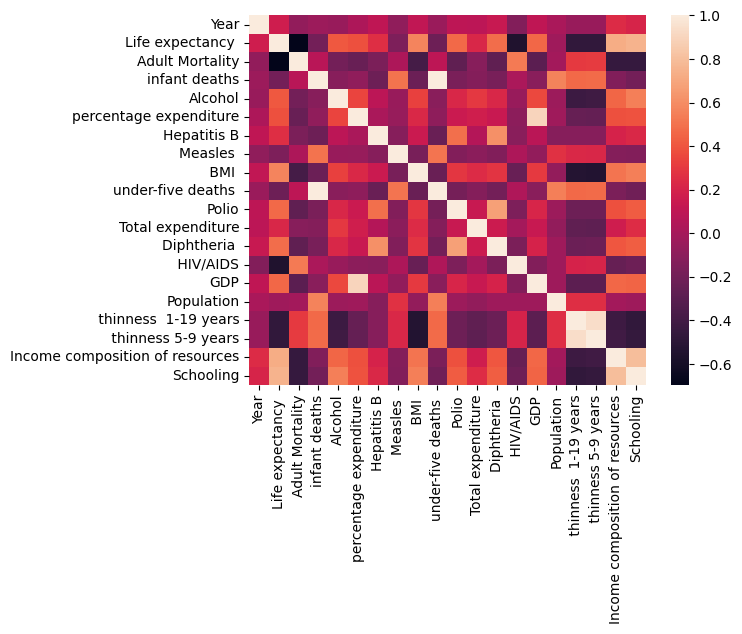

In [8]:
corrdat = data.corr()
sns.heatmap(corrdat)

Feature Selection for Regression Model

In [14]:
data_test = data.iloc[:,[1,5]]
data_test.head()

,Year,infant deaths
0,2015,62
1,2014,64
2,2013,66
3,2012,69
4,2011,71


In [11]:
data_index = data.iloc[:,[3,13]]
data_index.head()

,Life expectancy,Total expenditure
0,65.0,8.16
1,59.9,8.18
2,59.9,8.13
3,59.5,8.52
4,59.2,7.87


In [15]:
data_name = data.loc[:,["Life expectancy ","Schooling"]]
data_name.head()

,Life expectancy,Schooling
0,65.0,10.1
1,59.9,10.0
2,59.9,9.9
3,59.5,9.8
4,59.2,9.5


In [16]:
data = data.loc[:,["Life expectancy ","Schooling"]]
data.head()

,Life expectancy,Schooling
0,65.0,10.1
1,59.9,10.0
2,59.9,9.9
3,59.5,9.8
4,59.2,9.5


In [21]:
data_temp =  data.dropna()

plot

<function matplotlib.pyplot.show(close=None, block=None)>

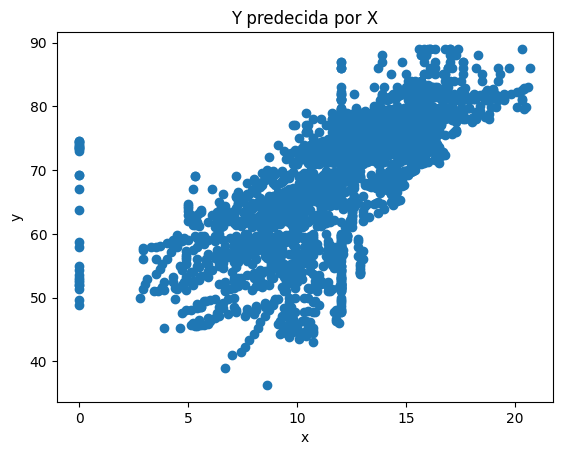

In [26]:
plt.scatter(data["Schooling"],data["Life expectancy "])
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

#Test Train Split


In [25]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imp.fit(data)
data.iloc[:,:] = imputer.transform(data)
data


,Life expectancy,Schooling
0,65.0,10.1
1,59.9,10.0
2,59.9,9.9
3,59.5,9.8
4,59.2,9.5
...,...,...
2933,44.3,9.2
2934,44.5,9.5
2935,44.8,10.0
2936,45.3,9.8


In [27]:
y = data["Life expectancy "]
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [30]:
X = data["Schooling"].values.reshape(-1, 1)
X



array([[10.1],
       [10. ],
       [ 9.9],
       ...,
       [10. ],
       [ 9.8],
       [ 9.8]])

In [31]:
X_train, X_test, y_train, y_test  = train_test_split(X,y)

In [36]:
print(X_train)

[[13.6]
 [14.3]
 [12.6]
 ...
 [12.9]
 [15.3]
 [ 0. ]]


#Training Model

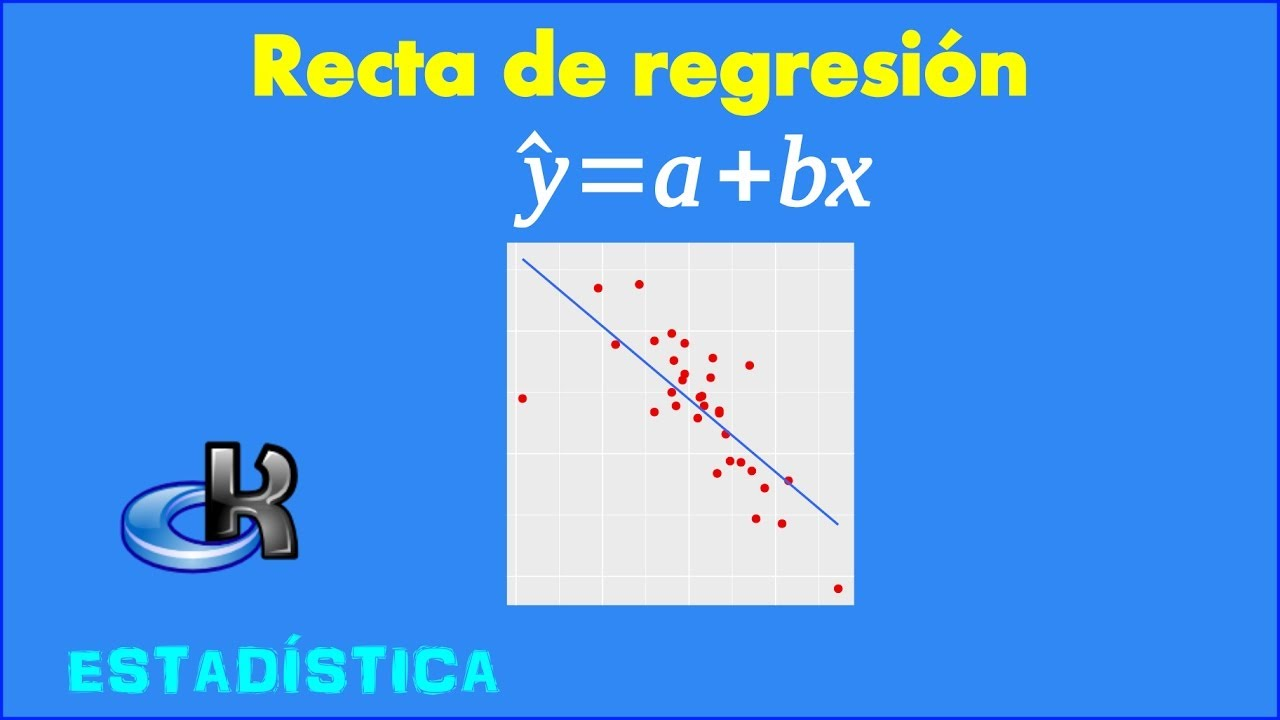

In [37]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [38]:
reg.fit(X_train,y_train)

LinearRegression()

In [45]:
coeficientes = reg.coef_
intercepta = reg.intercept_
#coeficientes
print("coeficientes : ",coeficientes[0])

#intercepta:
print("intercepta: ",intercepta)

coeficientes :  2.06764853701982
intercepta:  44.31355306704157


In [44]:
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [41]:
print(reg)

LinearRegression()


In [42]:
data.head(1)

,Life expectancy,Schooling
0,65.0,10.1


In [43]:
resultado = 44.31355306704157 + (2.06764853701982 * 10.1)
resultado

65.19680329094174

Prediciendo Valores Del set de datos

In [46]:
predicted_data = reg.predict(X)
predicted_data

array([65.19680329, 64.99003844, 64.78327358, ..., 64.99003844,
       64.57650873, 64.57650873])

In [47]:
predicted_train = reg.predict(X_train)

In [48]:
predicted_test = reg.predict(X_test)

Ploting Regression


<function matplotlib.pyplot.show(close=None, block=None)>

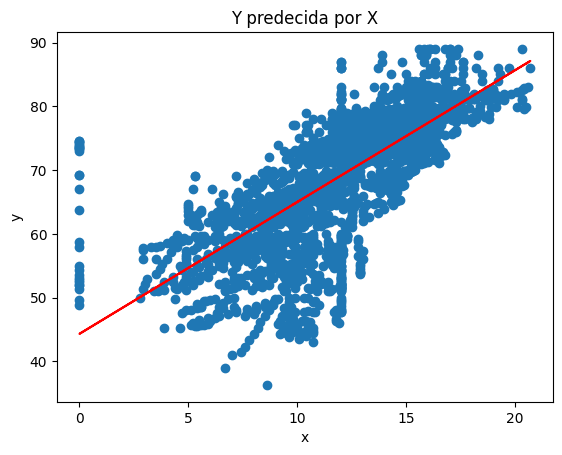

In [49]:
plt.scatter(X,y)
plt.plot(X,predicted_data,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

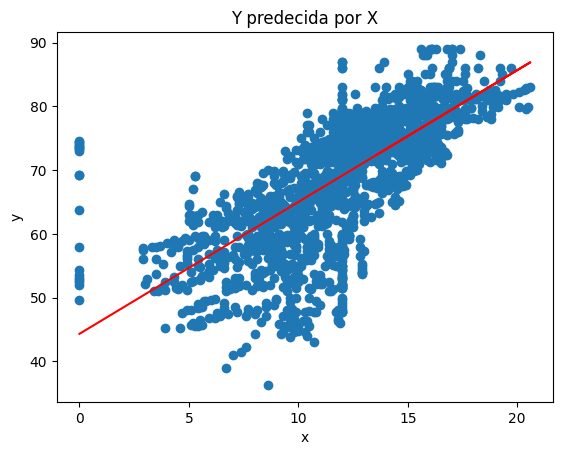

In [50]:
plt.scatter(X_train,y_train)
plt.plot(X_train,predicted_train,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

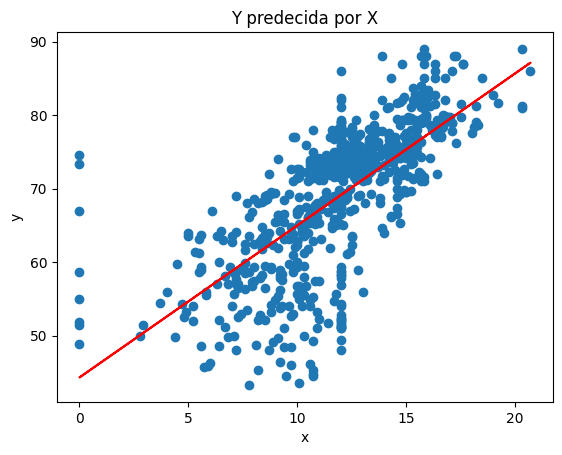

In [51]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predicted_test,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

Dataframe de actual y predecido

In [53]:
A_P_data = pd.DataFrame({"actual":y,"predicted":predicted_data})
A_P_data.head()

,actual,predicted
0,65.0,65.196803
1,59.9,64.990038
2,59.9,64.783274
3,59.5,64.576509
4,59.2,63.956214


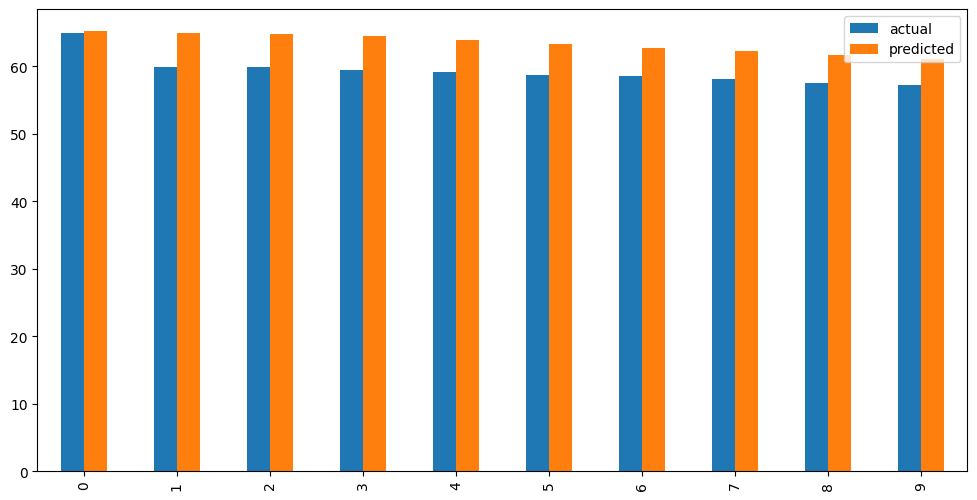

In [54]:
A_P_data.head(10).plot(kind='bar',figsize=(12,6))
plt.show()

Error de predicción

In [55]:
y_predict = reg.predict(X_test)

res = (y_predict - y_test)
RSS = (res*res).sum()

print("residual de suma de cuadrados: ",RSS)

residual de suma de cuadrados:  33414.07827429245
